In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [6]:
# training_datagen = ImageDataGenerator( rescale = 1.0/255.,
#                                    width_shift_range=0.2,
#                                    height_shift_range=0.2)
training_datagen = ImageDataGenerator(rescale = 1.0/255., zoom_range = 0.2)
validation_datagen  = ImageDataGenerator( rescale = 1.0/255.)
TRAINING_DIR = '/Users/anranxu/Desktop/ML/training'
VALIDATION_DIR = '/Users/anranxu/Desktop/ML/validation'
train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size =(504,504),
    color_mode ='grayscale',
    class_mode ='categorical',
    batch_size = 32,
)
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(504,504),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size= 32
)

Found 1680 images belonging to 20 classes.
Found 400 images belonging to 20 classes.


In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(504,504,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(20, activation='softmax')  
])

In [7]:
model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=180, steps_per_epoch=1680//32, validation_data = validation_generator, verbose = 1, validation_steps=400//32, callbacks =[callbacks])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 502, 502, 16)      160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 251, 251, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 249, 249, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 124, 124, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 122, 122, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 61, 61, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 238144)            0

52/52 [==============================] - 203s 4s/step - loss: 0.7283 - accuracy: 0.6814 - val_loss: 0.6519 - val_accuracy: 0.6745
Epoch 48/180
52/52 [==============================] - 204s 4s/step - loss: 0.6893 - accuracy: 0.6820 - val_loss: 0.5373 - val_accuracy: 0.7422
Epoch 49/180
52/52 [==============================] - 204s 4s/step - loss: 0.6679 - accuracy: 0.7075 - val_loss: 0.6676 - val_accuracy: 0.6589
Epoch 50/180
52/52 [==============================] - 206s 4s/step - loss: 0.6764 - accuracy: 0.7136 - val_loss: 0.7474 - val_accuracy: 0.6250
Epoch 51/180
52/52 [==============================] - 205s 4s/step - loss: 0.6331 - accuracy: 0.7148 - val_loss: 0.6760 - val_accuracy: 0.7031
Epoch 52/180
52/52 [==============================] - 210s 4s/step - loss: 0.6770 - accuracy: 0.7039 - val_loss: 0.6675 - val_accuracy: 0.6693
Epoch 53/180
52/52 [==============================] - 209s 4s/step - loss: 0.6701 - accuracy: 0.6948 - val_loss: 0.5466 - val_accuracy: 0.7214
Epoch 54/180

52/52 [==============================] - 205s 4s/step - loss: 0.5119 - accuracy: 0.8252 - val_loss: 0.3624 - val_accuracy: 0.8307
Epoch 105/180
52/52 [==============================] - 205s 4s/step - loss: 0.4787 - accuracy: 0.7907 - val_loss: 0.6182 - val_accuracy: 0.7552
Epoch 106/180
52/52 [==============================] - 204s 4s/step - loss: 0.4736 - accuracy: 0.8046 - val_loss: 0.3281 - val_accuracy: 0.8177
Epoch 107/180
52/52 [==============================] - 201s 4s/step - loss: 0.5026 - accuracy: 0.8192 - val_loss: 0.6815 - val_accuracy: 0.6823
Epoch 108/180
52/52 [==============================] - 203s 4s/step - loss: 0.5779 - accuracy: 0.8307 - val_loss: 0.2984 - val_accuracy: 0.8906
Epoch 109/180
52/52 [==============================] - 204s 4s/step - loss: 0.3865 - accuracy: 0.8350 - val_loss: 0.2596 - val_accuracy: 0.8958
Epoch 110/180
52/52 [==============================] - 204s 4s/step - loss: 0.4751 - accuracy: 0.8180 - val_loss: 0.5234 - val_accuracy: 0.7500
Epoch 

Epoch 161/180
52/52 [==============================] - 203s 4s/step - loss: 0.1910 - accuracy: 0.9436 - val_loss: 0.9423 - val_accuracy: 0.6953
Epoch 162/180
52/52 [==============================] - 202s 4s/step - loss: 0.2155 - accuracy: 0.9169 - val_loss: 0.2273 - val_accuracy: 0.8932
Epoch 163/180
52/52 [==============================] - 203s 4s/step - loss: 0.2427 - accuracy: 0.9126 - val_loss: 0.1450 - val_accuracy: 0.9349
Epoch 164/180
52/52 [==============================] - 205s 4s/step - loss: 0.2537 - accuracy: 0.9123 - val_loss: 0.7368 - val_accuracy: 0.8359
Epoch 165/180
52/52 [==============================] - 201s 4s/step - loss: 0.2134 - accuracy: 0.9142 - val_loss: 0.1371 - val_accuracy: 0.9453
Epoch 166/180
52/52 [==============================] - 205s 4s/step - loss: 0.2592 - accuracy: 0.9056 - val_loss: 0.2129 - val_accuracy: 0.8984
Epoch 167/180
52/52 [==============================] - 203s 4s/step - loss: 0.1917 - accuracy: 0.9290 - val_loss: 0.1083 - val_accuracy:

In [8]:
model.save('/Users/anranxu/Desktop/3_layers_maxpooling_180_epochs.h5')

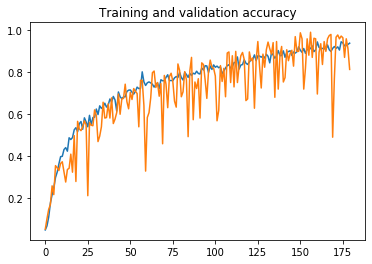

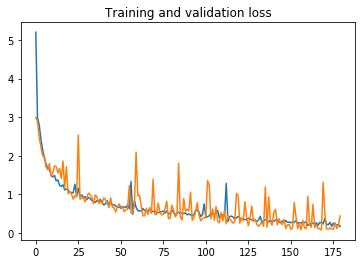

In [10]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# plt.plot(epochs, acc, 'r', label='Training accuracy')
# plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
# plt.title('Training and validation accuracy')
# plt.legend(loc=0)
# plt.figure()


# plt.show()
plt.figure()
plt.plot( epochs,     acc )
plt.plot( epochs, val_acc )
plt.title('Training and validation accuracy')
plt.savefig('/Users/anranxu/Desktop/Training and validation accuracy(180).jpg')
plt.figure()
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss' )
plt.savefig('/Users/anranxu/Desktop/Training and validation loss(180).jpg')

In [12]:
img = load_img('/Users/anranxu/Desktop/ML/training/0.4/0.4(1).jpg', color_mode="grayscale")
img_array = img_to_array(img)
img_array = tf.expand_dims(img_array/255, 0)
classes = model.predict_classes(img_array)
print(classes)

[4]


In [73]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
loaded_model = load_model('/Users/anranxu/Desktop/3_layers_maxpooling_180_epochs.h5')
img = load_img('/Users/anranxu/Desktop/ML/training/0.3/0.3(1)_(91,96).jpg', color_mode="grayscale")
img_array = img_to_array(img)
img_array = tf.expand_dims(img_array/255, 0)
classes = loaded_model.predict_classes(img_array)
print(classes)

[2]


In [4]:
import tensorflow as tf
ACCURACY_THRESHOLD = 0.97

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > ACCURACY_THRESHOLD):
            print("\nReached %2.2f%% accuracy, so stopping training!!" %(ACCURACY_THRESHOLD*100))
            self.model.stop_training = True

# Instantiate a callback object
callbacks = myCallback()


In [17]:
model.summary()
# optimizer = tf.keras.optimizers.SGD(lr=8e-4, momentum=0.6)

model.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

history = model.fit(train_generator, epochs=200, steps_per_epoch=840//32, validation_data = validation_generator, verbose = 1, validation_steps=200//32, callbacks =[callbacks])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 502, 502, 16)      160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 251, 251, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 249, 249, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 124, 124, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 122, 122, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 61, 61, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 238144)           

KeyboardInterrupt: 